<a href="https://colab.research.google.com/github/maaz-bin-asad/Face-mask-recognition-neural-net/blob/master/mask_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Joining paths of directories

In [5]:
import os
path='/content/drive/My Drive/Face Mask Detection/dataset'
categories=os.listdir(path)
print(categories)
labels=[i for i in range(len(categories))]
label_dict=dict(zip(categories,labels))
print(label_dict)
mask=os.path.join(path,'with mask')
print(len(os.listdir(mask)))
nomask=os.path.join(path,'without mask')
print(len(os.listdir(nomask)))

['without mask', 'with mask']
{'without mask': 0, 'with mask': 1}
690
686


Using transfer learning

In [7]:
import tensorflow 
from tensorflow.keras import Model
from tensorflow.keras.applications.vgg16 import VGG16
pre_trained_model=VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=[150,150,3],
)
for layer in pre_trained_model.layers:
    layer.trainable=False
from tensorflow.keras.optimizers import RMSprop
x=tensorflow.keras.layers.Flatten()(pre_trained_model.output)
x=tensorflow.keras.layers.Dense(1,activation='sigmoid')(x)
model=Model(pre_trained_model.input,outputs=x)
print(model.summary())
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,shear_range=0.2)
train_generator=train_datagen.flow_from_directory(path,target_size=(150,150),batch_size=20,class_mode='binary')
history=model.fit_generator(train_generator,steps_per_epoch=1,epochs=5,verbose=1)

Found 1376 images belonging to 2 classes.
Epoch 1/5
1/1 [==============================] - 0s 2ms/step - loss: 0.7480 - accuracy: 0.5500
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.6000
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 0.8453 - accuracy: 0.3000
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 0.6715 - accuracy: 0.6500
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.6000


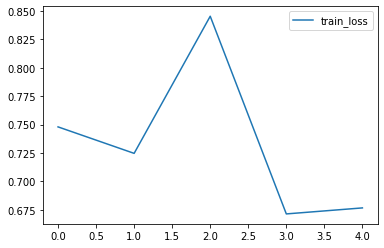

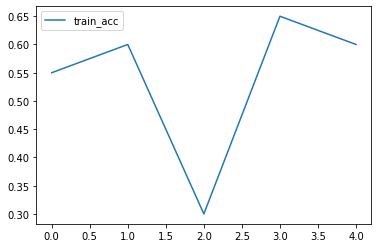

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train_loss')
plt.legend()
plt.show()
plt.plot(history.history['accuracy'],label='train_acc')
plt.legend()
plt.show()

In [0]:
import cv2
face=cv2.CascadeClassifier('/content/drive/My Drive/Face Mask Detection/haarcascade_frontalface_default.xml')
cap=cv2.VideoCapture(0)
labels_dict={0:'MASK',1:'NO MASK'}
color_dict={0:(0,255,0),1:(0,0,255)}

Detecting faces 

In [0]:
from google.colab.patches import cv2_imshow
while(True):

    ret,img=cap.read()
    faces=face.detectMultiScale(img,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(150,150))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,150,150,3))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
        
    cv2_imshow(img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
cap.release()